In [19]:
import numpy as np

from template_funciones_2 import *#calcula_L, calcula_lambda, calcula_R, calcula_Q, metpot1, metpot2, metpotI,  metpotI2, laplaciano_iterativo, calcula_2E, deflaciona
from template_funciones import *#calcular_inversa, calculaLU
%load_ext autoreload
%autoreload 2

A = np.array([
   [0, 1, 1, 1, 0, 0, 0, 0],
   [1, 0, 1, 1, 0, 0, 0, 0],
   [1, 1, 0, 1, 0, 1, 0, 0],
   [1, 1, 1, 0, 1, 0, 0, 0],
   [0, 0, 0, 1, 0, 1, 1, 1],
   [0, 0, 1, 0, 1, 0, 1, 1],
   [0, 0, 0, 0, 1, 1, 0, 1],
   [0, 0, 0, 0, 1, 1, 1, 0]
])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
L = calcula_L(A)

print(f"Matriz L:\n{L}")

mu = 10e-5
v1, l1, _ = metpotI2(L, mu)
print(f"\nAutovector = \n{v1}\n\nAsociado a λ_1 = {l1}")

LAMBDA = calcula_lambda(L, v1)
print(f"\nEl corte minimo para A es {LAMBDA}")

Matriz L:
[[ 3. -1. -1. -1.  0.  0.  0.  0.]
 [-1.  3. -1. -1.  0.  0.  0.  0.]
 [-1. -1.  4. -1.  0. -1.  0.  0.]
 [-1. -1. -1.  4. -1.  0.  0.  0.]
 [ 0.  0.  0. -1.  4. -1. -1. -1.]
 [ 0.  0. -1.  0. -1.  4. -1. -1.]
 [ 0.  0.  0.  0. -1. -1.  3. -1.]
 [ 0.  0.  0.  0. -1. -1. -1.  3.]]

Autovector = 
[ 0.4253254   0.4253254   0.26286556  0.26286556 -0.26286556 -0.26286556
 -0.4253254  -0.4253254 ]

Asociado a λ_1 = 0.76393202250025

El corte minimo para A es 2.0


Para encontrar $\Lambda$ tenemos que encontrar el vector $s^{\Lambda}$ optimo que la minimice. Eso equivale a hallar el autovector asociado al segundo autovalor mas pequeño en modulo de $L$ 

In [3]:
mu = 10e-5
v1, l1, _ = metpotI2(L, mu)
print(f"\nAutovector = \n{v1}\n\nAsociado a λ_1 = {l1}")

LAMBDA = calcula_lambda(L, v1)
print(f"\nEl corte minimo para A es {LAMBDA}")


Autovector = 
[-0.4253254  -0.4253254  -0.26286556 -0.26286556  0.26286556  0.26286556
  0.4253254   0.4253254 ]

Asociado a λ_1 = 0.7639320224999894

El corte minimo para A es 2.0


In [4]:
# ver que el auto valor mas chico es 0 y esta asociodo al autvector de 1s
# TODO: no me esta dando 0 je
M = L + mu * np.eye(A.shape[0])
print(np.linalg.eigvals(M))
v1, l1, _ = metpotI(L, mu)
v1, l1

[5.23616798e+00 4.00010000e+00 1.00000000e-04 7.64032023e-01
 6.00010000e+00 4.00010000e+00 4.00010000e+00 4.00010000e+00]


(array([0.35355339, 0.35355339, 0.35355339, 0.35355339, 0.35355339,
        0.35355339, 0.35355339, 0.35355339]),
 np.float64(10000.000000002752))

Para hallar el corte minimo podemos hacer recursion sobre la red separandola en $k$ iteraciones. Obteniendo asi $2^{k}$ comunidades.

In [5]:
k = 3
laplaciano_iterativo(A, k)

[[3], [1], [0], [2], [5, 6], [4], [7]]

Otra forma de hallar comunidades tiene que ver con la **modularidad**. Donde el objetivo esta en maximizar $Q$. Para eso necesitamos el autovector con autovalor de mayor modulo de la matriz $R = A - P$. $R$ es simetrica. La modularidad puede calcularse entonces como $Q = \frac{1}{4E} s^{t}Rs$ con $2E = \sum_{i}^{n} \sum_{j}^{n} A_{ij}$

In [6]:
#Calculamos R
R = calcula_R(A)

print(f"Vemos que R es simetrica, R = R^t: \n{R == R.T}")
#Calculamos su autovector con autovalor de mayor modulo con el metodo de la potencia
v1, l1, _ = metpot1(R)

print(f"\nAutovector: {v1}\nAsociado a λ_1 = {l1}")

Q = calcula_Q(R, v1)

E2 = calcula_2E(A)

# Hace falta dividir por 1/4E ???
Q = Q * 1/(2*E2)
print(f"\nLa modularidad de la red es {Q}")


Vemos que R es simetrica, R = R^t: 
[[ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]]

Autovector: [-0.38475462 -0.38475463 -0.31930541 -0.31933026  0.31933026  0.31930541
  0.38475463  0.38475462]
Asociado a λ_1 = 2.981281143218434

La modularidad de la red es 0.4209183673469387


Aqui podemos ver como con el metodo de la potencia los componentes del vector aproximado en $\R^{3}$ converge al autovector asociado al autovalor de mayor modulo. 

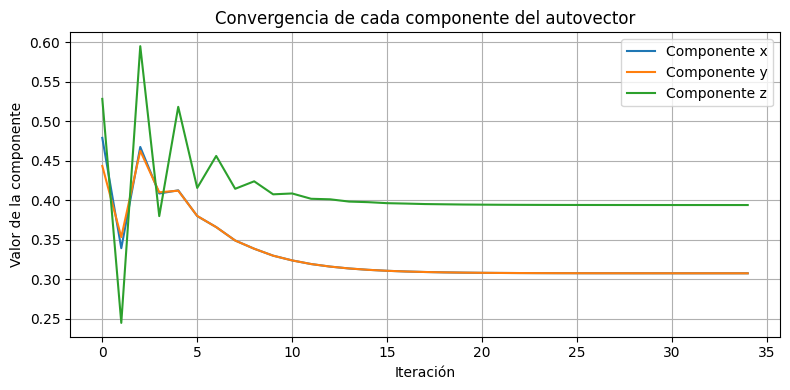

TypeError: Axes3D.scatter() got multiple values for argument 'c'

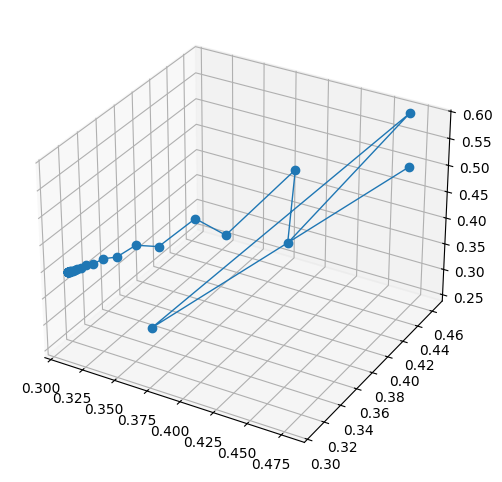

In [7]:
def metpot(A,v,k):
    for i in range(k):
        Av = A @ v
        v = Av / np.linalg.norm(Av, 2)
    return v

# A = np.array([[0.9, 0.075, 0.025], [0.15, 0.8, 0.05], [0.25, 0.25, 0.5]])
# v = np.array([1,0.5,-0.75])


avec, aval, _ = metpot1(A, 1e-10, plot=True)


### 1 - Autovectores y autovalores de $L$ y $R$

a) Muestre que el vector unos es autovector de las matrices $R$ y $L$. ¿Que autovalor tiene? ¿Y que agrupacion de la red representa?

### 2 - Extensiones metodo de la potencia

#### Shifting de autovalores

In [ ]:
avec_A, aval_A,_ = metpot1(A)

print(f"Autovector de A:\n{avec_A}\nautovalor asociado: {aval_A}")
mu = 3
M = A + mu*np.eye(A.shape[0])

avec_M, aval_M, _ = metpot1(M) 
print(f"Autovector de A:\n{avec_M}\nautovalor asociado: {aval_M}")

print("aval_A + mu == aval_M: ",np.allclose(aval_A + mu, aval_M))

# Como A tiene 0 en su diagonal diremos que M = A + 0I para confirmar que M no es inversible

calcular_inversa(*calculaLU(A))

Autovector de A:
[0.30777463 0.30777463 0.39415594 0.3941565  0.39404892 0.39404949
 0.30763757 0.30763757]
autovalor asociado: 3.5615527825683806
Autovector de A:
[-0.30785779 -0.30785779 -0.39422114 -0.39422114 -0.39398424 -0.39398424
 -0.30755437 -0.30755437]
autovalor asociado: 6.561552664625437
aval_A + mu == aval_M:  True
La matriz no es inversible


/home/agus_russo/UBA/TP2-alc-2025-2C/template_funciones.py:41: RuntimeWarning: divide by zero encountered in scalar divide
  factor = U[j, i] / U[i, i]  # Calculo del factor de eliminacion
/home/agus_russo/UBA/TP2-alc-2025-2C/template_funciones.py:42: RuntimeWarning: invalid value encountered in multiply
  U[j, i:] = U[j, i:] - factor * U[i, i:]  # Esacalonamos las filas
/home/agus_russo/UBA/TP2-alc-2025-2C/template_funciones.py:42: RuntimeWarning: invalid value encountered in cast
  U[j, i:] = U[j, i:] - factor * U[i, i:]  # Esacalonamos las filas
/home/agus_russo/UBA/TP2-alc-2025-2C/template_funciones.py:41: RuntimeWarning: invalid value encountered in scalar divide
  factor = U[j, i] / U[i, i]  # Calculo del factor de eliminacion


#### Método de la potencia inverso

Por lo mencionado anteriormente si  $\lambda_{i} \neq 0 \forall i \rightarrow L + \mu I$ es inversible. Nos podemos asegurar de que ningun elementod de la diagonal sea igual a 0.  

In [ ]:
L = calcula_L(A)
mu = 1
print(np.diag(L+mu*np.eye(L.shape[0])))

v1, l1, _ = metpotI(L, mu)
print(f"Autovector de autovalor mas chico:\n{v1}\nAutovalor mas chico: {l1}")

#El autovalor es casi 1 ya que le sumamos 1 a los autovalores de L. Si lo restamos obtenemos el autovalor mas chico en modulo de L que es 0.
print(np.allclose(0,l1-mu))

[4. 4. 5. 5. 5. 5. 4. 4.]
Autovector de autovalor mas chico:
[0.35355339 0.35355339 0.35355339 0.35355339 0.35355339 0.35355339
 0.35355339 0.35355339]
Autovalor mas chico: 0.9999999999999998
True


#### Deflación de Hotelling

Usaremos $A$ que sabemos que es simetrica y por lo tanto tiene una base de autovectores ortogonales para mostrar que una vez deflacionada A, $deflaciona(A) = A'$ su autovector $v_{1}$ asociado al autovalor de mayor modulo $\lambda_{1}$ de A, ahora para $A'$ esta asociado al autovalor 0. Para eso vamos a suponer que si $\lambda = 0$ es el autovalor asociado a $v_{1}$ vale que:

$$ A'v_{1} = \lambda v_{1} = 0v_{1} = 0 $$

In [ ]:
#Calculamos el autovector y autovalor de mayor modulo para A
v1,l1,_= metpot1(A,1e-17)

#Aplicamos la deflación a A para obtener A'
deflA = deflaciona(A)

#Calculamos A'v_1
print(deflA@v1)
print(np.allclose(0,deflA@v1))

[-6.51574089e-09 -6.51574089e-09 -5.08735720e-09 -5.08731635e-09
  5.08731635e-09  5.08735709e-09  6.51574103e-09  6.51574100e-09]
True


## Relacion TP1

In [20]:
# Carga de paquetes necesarios para graficar
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd # Para hacer cosas geográficas
import networkx as nx # Construcción de la red en NetworkX
from template_funciones import *

%load_ext autoreload
%autoreload 2

# Leemos el archivo, retenemos aquellos museos que están en CABA, y descartamos aquellos que no tienen latitud y longitud
museos = gpd.read_file('https://raw.githubusercontent.com/MuseosAbiertos/Leaflet-museums-OpenStreetMap/refs/heads/principal/data/export.geojson')
barrios = gpd.read_file('https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-educacion/barrios/barrios.geojson')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


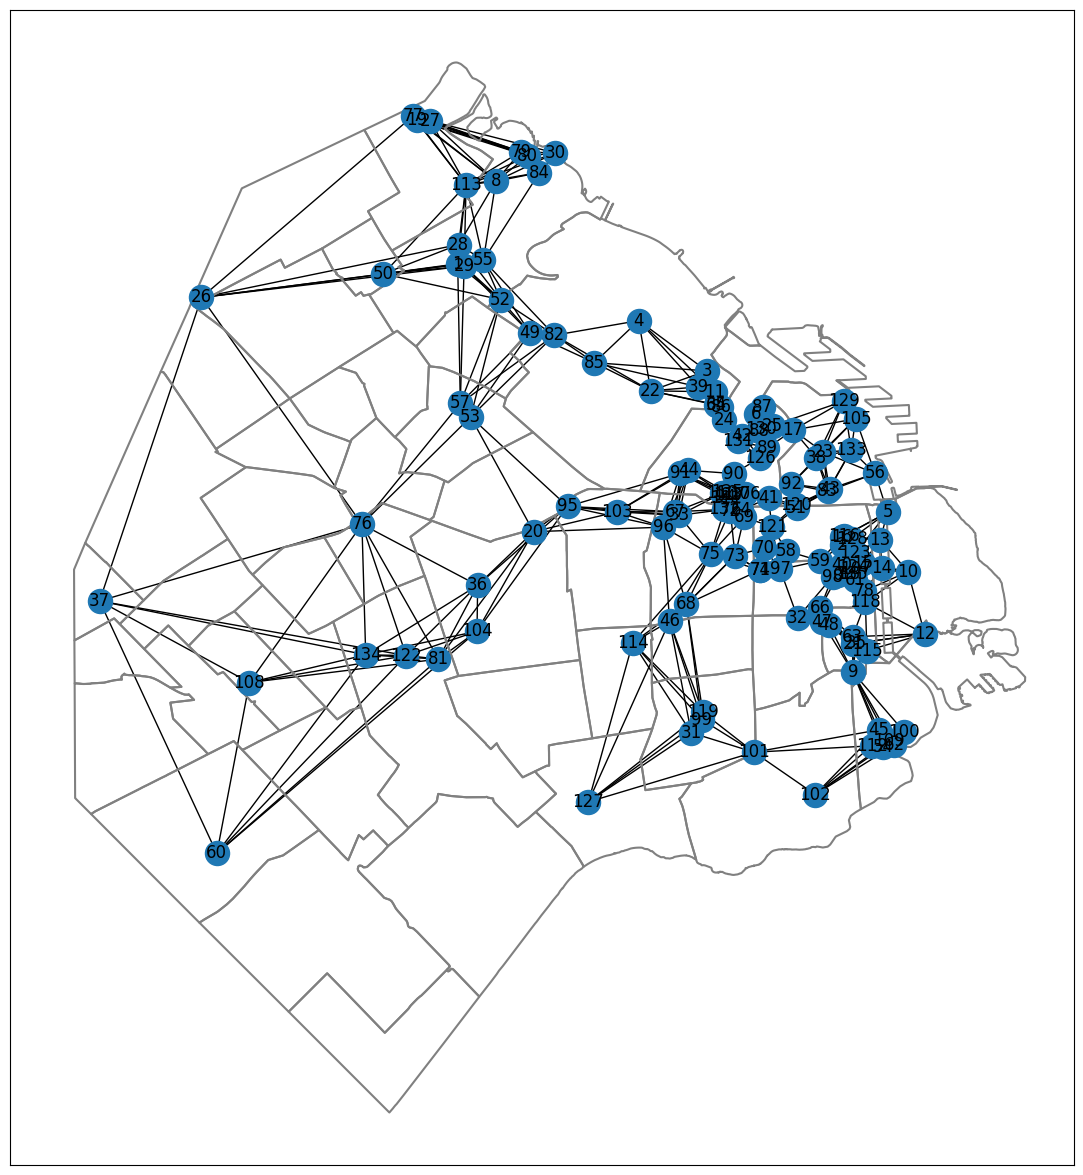

In [33]:
# En esta línea:
# Tomamos museos, lo convertimos al sistema de coordenadas de interés, extraemos su geometría (los puntos del mapa), 
# calculamos sus distancias a los otros puntos de df, redondeamos (obteniendo distancia en metros), y lo convertimos a un array 2D de numpy
D = museos.to_crs("EPSG:22184").geometry.apply(lambda g: museos.to_crs("EPSG:22184").distance(g)).round().to_numpy()
m = 6 # Cantidad de links por nodo
A = construye_adyacencia(D,m)

G = nx.from_numpy_array(A) # Construimos la red a partir de la matriz de adyacencia
# Construimos un layout a partir de las coordenadas geográficas
G_layout = {i:v for i,v in enumerate(zip(museos.to_crs("EPSG:22184").get_coordinates()['x'],museos.to_crs("EPSG:22184").get_coordinates()['y']))}
fig, ax = plt.subplots(figsize=(15, 15)) # Visualización de la red en el mapa
barrios.to_crs("EPSG:22184").boundary.plot(color='gray',ax=ax) # Graficamos Los barrios
nx.draw_networkx(G,G_layout,ax=ax) # Graficamos los museos

C:\Users\yo_ju\AppData\Local\Temp\ipykernel_12548\1818228774.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('nipy_spectral', num_grupos)  # Elegí un mapa de colores. También podés usar 'hsv', 'Set3', etc.
C:\Users\yo_ju\AppData\Local\Temp\ipykernel_12548\1818228774.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('nipy_spectral', num_grupos)  # Elegí un mapa de colores. También podés usar 'hsv', 'Set3', etc.
C:\Users\yo_ju\AppData\Local\Temp\ipykernel_12548\1818228774.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 

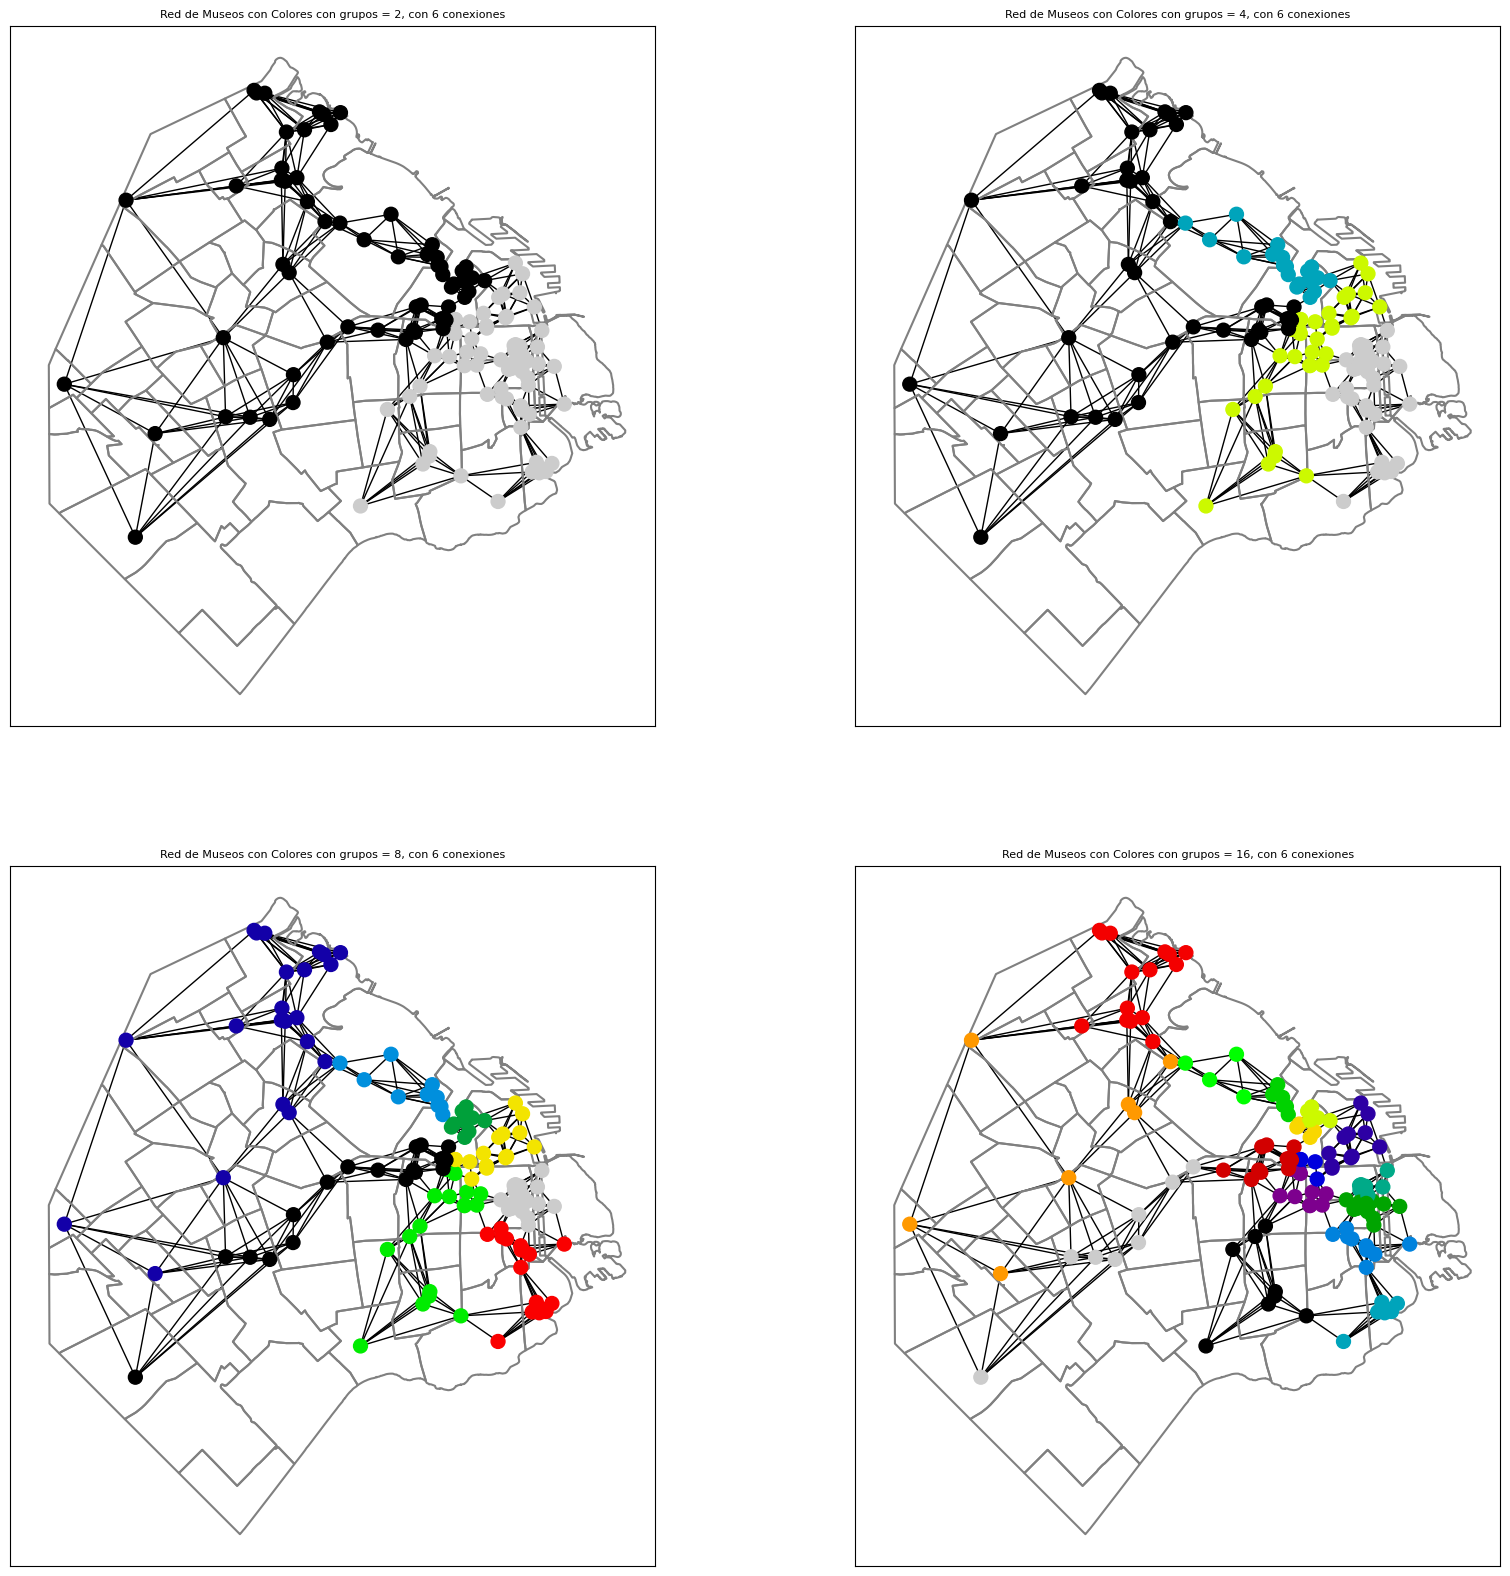

In [31]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.cm as cm
import matplotlib.colors as mcolors

fig, axs = plt.subplots(2, 2, figsize=(20, 20))
for idx_num,cant_niveles in enumerate([1, 2, 3, 4]): 
    A_sim = 1/2*(A + A.T) # Hacemos la matriz simétrica
    nombres = laplaciano_iterativo(A_sim,niveles=cant_niveles) # Aplicamos el laplaciano iterativo
    grupo = {}
    for idx,i in enumerate(nombres):
        grupo[idx] = i


    axs = axs.flatten()
    num_grupos = len(grupo)
    colormap = cm.get_cmap('nipy_spectral', num_grupos)  # Elegí un mapa de colores. También podés usar 'hsv', 'Set3', etc.

    # Asignar un color a cada grupo
    grupo_color = {}
    for i, grupo_id in enumerate(sorted(grupo.keys())):
        color = mcolors.to_hex(colormap(i))
        for nodo in grupo[grupo_id]:
            grupo_color[nodo] = color

    # Función para obtener color del nodo
    def asignar_color_dinamico(nodo):
        return grupo_color.get(nodo, "#000000")  # Negro si no se encuentra

    # Crear colores de nodos
    colores_nodos = [asignar_color_dinamico(n) for n in G.nodes]

    # Dibujar
    barrios.to_crs("EPSG:22184").boundary.plot(color='gray', ax=axs[idx_num])
    axs[idx_num].set_title(f"Red de Museos con Colores con grupos = {num_grupos}, con {m} conexiones", fontsize=8)

    nx.draw_networkx(
        G,
        G_layout,
        node_size=100,
        ax=axs[idx_num],
        with_labels=False,
        node_color=colores_nodos,
    )


C:\Users\yo_ju\AppData\Local\Temp\ipykernel_12548\2718901791.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('nipy_spectral', num_grupos)  # Elegí un mapa de colores. También podés usar 'hsv', 'Set3', etc.


KeyboardInterrupt: 

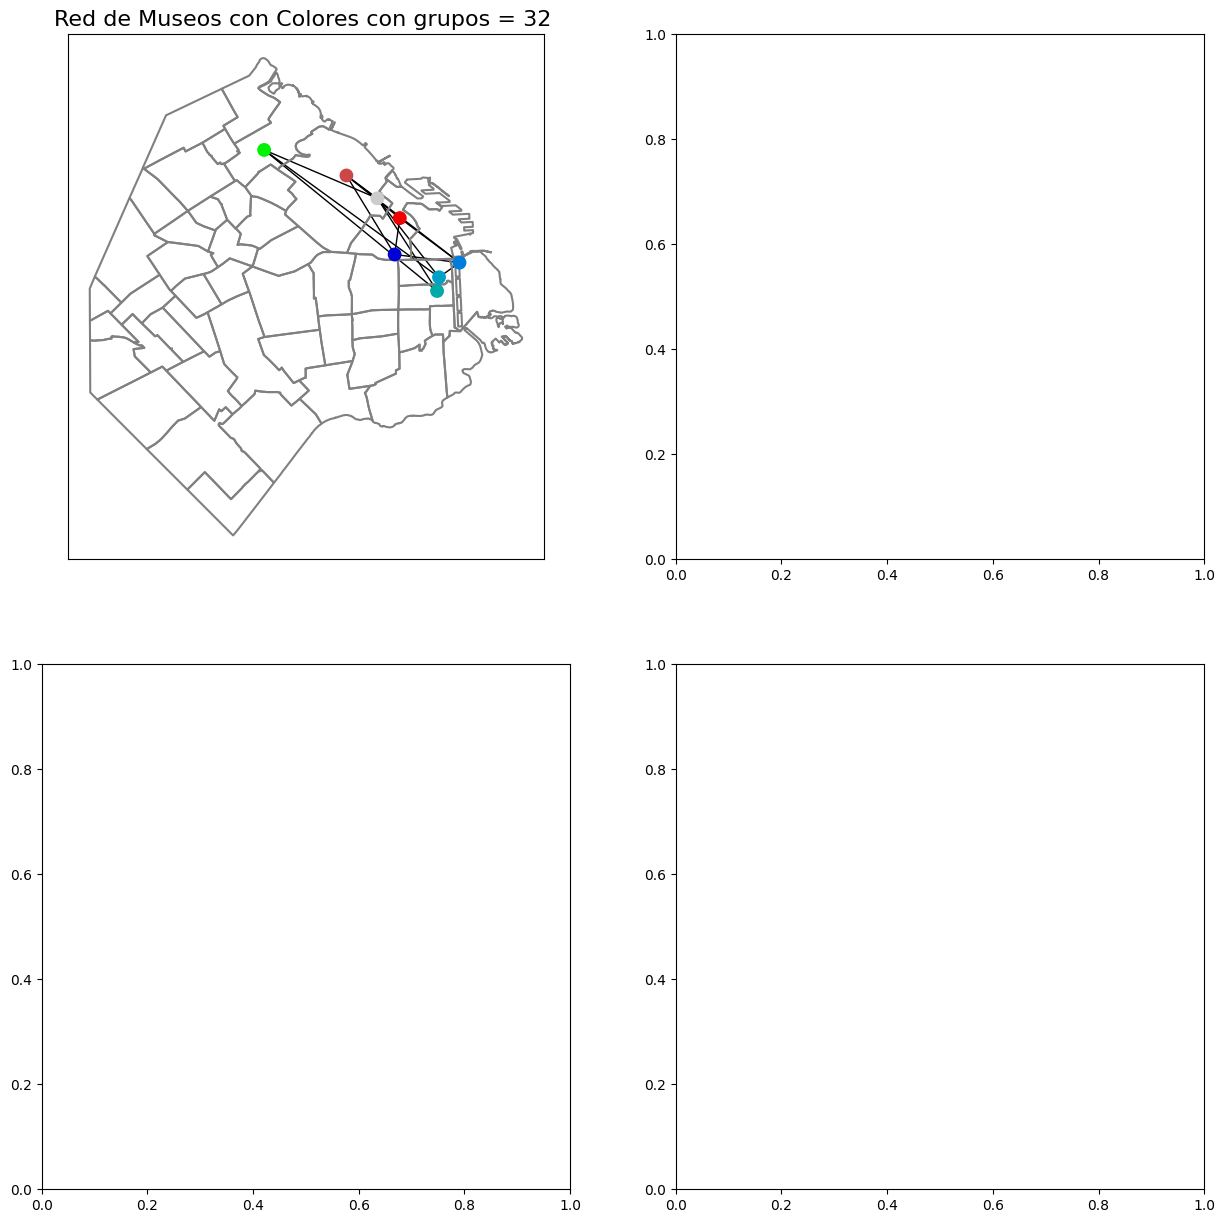

In [13]:
#TODO: Esto tarda mucho.
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
for idx_num,cant_niveles in enumerate([5,6,7,8]): 
    A_sim = 1/2*(A_tp + A_tp.T) # Hacemos la matriz simétrica
    nombres = laplaciano_iterativo(A_sim,niveles=cant_niveles) # Aplicamos el laplaciano iterativo
    grupo = {}
    for idx,i in enumerate(nombres):
        grupo[idx] = i


    axs = axs.flatten()
    num_grupos = len(grupo)
    colormap = cm.get_cmap('nipy_spectral', num_grupos)  # Elegí un mapa de colores. También podés usar 'hsv', 'Set3', etc.

    # Asignar un color a cada grupo
    grupo_color = {}
    for i, grupo_id in enumerate(sorted(grupo.keys())):
        color = mcolors.to_hex(colormap(i))
        for nodo in grupo[grupo_id]:
            grupo_color[nodo] = color

    # Función para obtener color del nodo
    def asignar_color_dinamico(nodo):
        return grupo_color.get(nodo, "#000000")  # Negro si no se encuentra

    # Crear colores de nodos
    colores_nodos = [asignar_color_dinamico(n) for n in G.nodes]

    # Dibujar
    barrios.to_crs("EPSG:22184").boundary.plot(color='gray', ax=axs[idx_num])
    axs[idx_num].set_title(f"Red de Museos con Colores con grupos = {num_grupos} ", fontsize=16)

    nx.draw_networkx(
        G,
        G_layout,
        node_size=80,
        ax=axs[idx_num],
        with_labels=False,
        node_color=colores_nodos,
    )
